#### <span style="color:#a50e3e;">Example. </span>  Sinusoidal kernel approximators

Another classic sub-family of kernel universal approximators: sine waves of increasing frequency.  This consists of the set of sine waves with frequency increasing by an e.g., integer factor like

$$f_1(x) = \text{sin}(x), ~~ f_2(x) = \text{sin}(2x), ~~ f_3(x) = \text{sin}(3x), ...$$

where the $m^{th}$ element given as $f_m(x) = \text{sin}(mx)$.

Below we plot the table of values for the first four of these catalog functions using their equations.

<IPython.core.display.Javascript object>


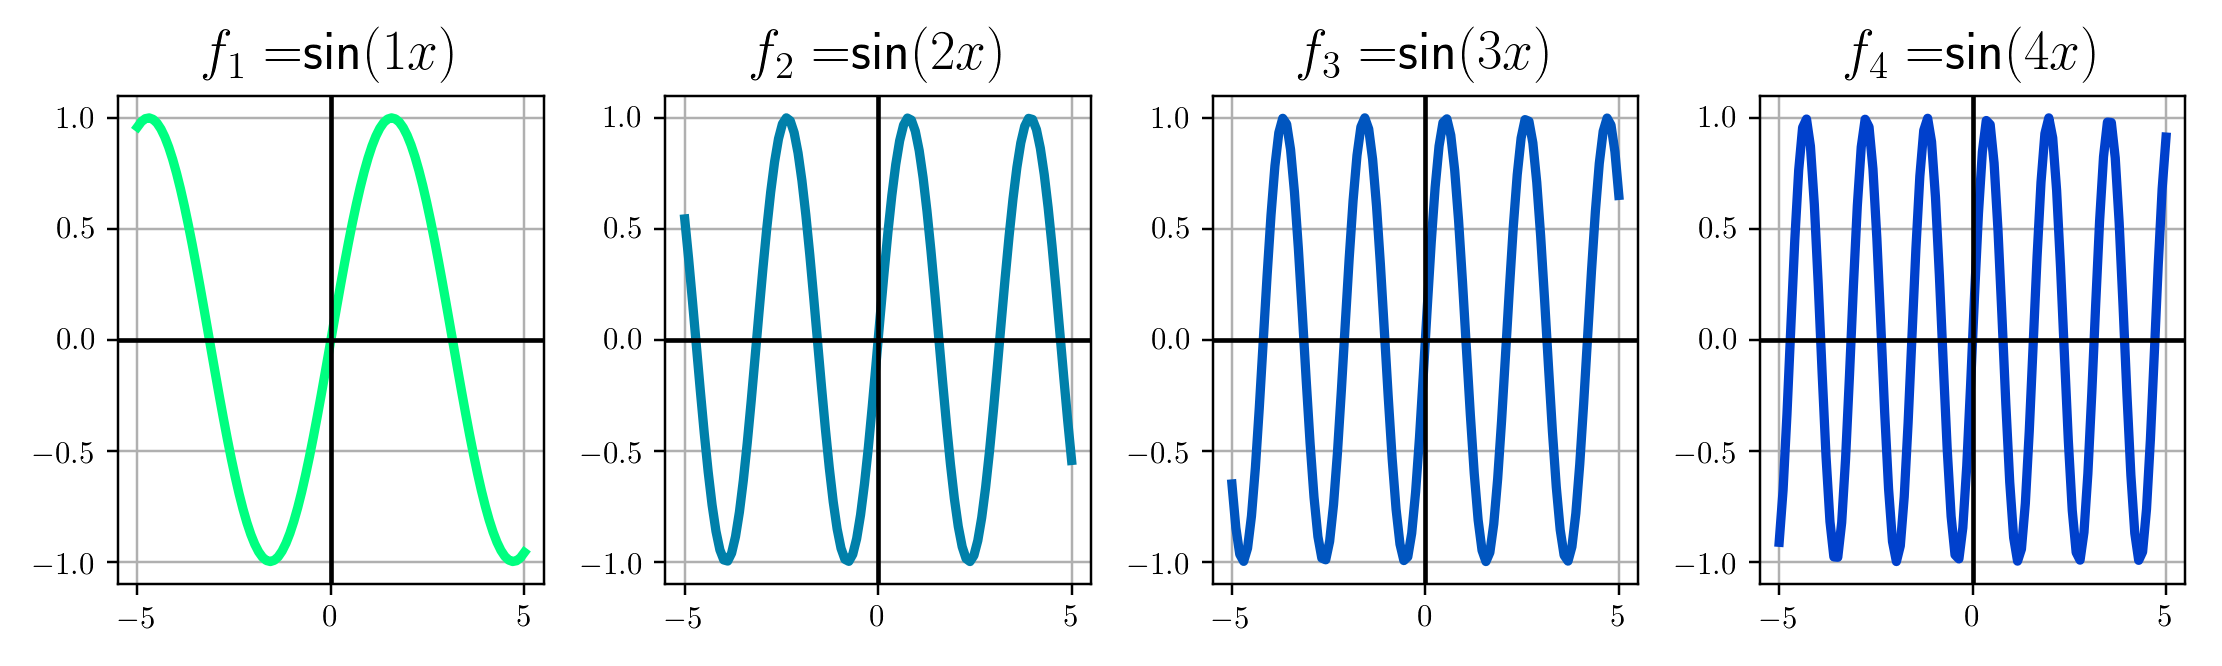

In [91]:
## This code cell will not be shown in the HTML version of this notebook
# build the first 4 non-constant polynomial basis elements
x = np.linspace(-5,5,100)
fig = plt.figure(figsize = (10,3))

for m in range(1,5):
    # make basis element
    fm = np.sin(m*x)
    fm_table = np.stack((x,fm),axis = 1)
    
    # plot the current element
    ax = fig.add_subplot(1,4,m)
    ax.plot(fm_table[:,0],fm_table[:,1],color = [0,1/float(m),m/float(m+1)],linewidth = 3)
    ax.set_title('$f_'+str(m) + ' = '  + '$sin$ ' +  '(' + str(m) + 'x)$',fontsize = 18)

    # clean up plot
    ax.grid(True, which='both')
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
plt.show()

As with the polynomials, notice how each of these catalog of elements if fixed.  They have no *tunable* parameters inside, the third element always looks like $f_3(x) = \text{sin}(x)$ - that is it always takes on that shape.  Also note, like polynomials to generalize this catalog of functions to higher dimensional input we shove each coordinate through the single dimensional version of the function separately.  So in the case of $N=2$ inputs the functions take the form  

\begin{equation}
f_1(x_1,x_2) = \text{sin}(x1), ~~ f_1(x_1,x_2) =  \text{sin}(2x_1)\text{sin}(5x_2), ~~ f_3(x_1,x_2) = \text{sin}(4x_1)\text{sin}(2x_2), ~~ f_4(x_1,x_2) = \text{sin}(7x_1)\text{sin}(x_2), ~~ ... 
\end{equation}

And these are listed in no particular order, and in general we can write a catalog element as $f_m(x_1,x_2) = \text{sin}(px_1)\text{sin}(qx_2) $ where $p$ and $q$ are any nonnegative integers.

We describe the kernel family in significantly more detail in Chapter 15.

#### <span style="color:#a50e3e;">Example. </span>  Relu example

Choosing another elementary function gives another sub-catalog of single-layer neural network functions.  The rectified linear unit (or 'relu' for short) is another popular example, elements of which (for single dimensional input) look like

\begin{equation}
f_1(x) = \text{max}\left(0,w_{1,0} + w_{1,1}x\right), ~~ f_2(x) = \text{max}\left(0,w_{2,0} + w_{2,1}x\right), ~~ f_3(x) = \text{max}\left(0,w_{3,0} + w_{3,1}x\right), ~~ f_4(x) = \text{max}\left(0,w_{4,0} + w_{4,1}x\right), ...
\end{equation}

Since these also have internal parameters each can once again take on a variety of shapes.  Below we plot $4$ instances of such a function, where in each case its *internal parameters* have been set at random.

<IPython.core.display.Javascript object>


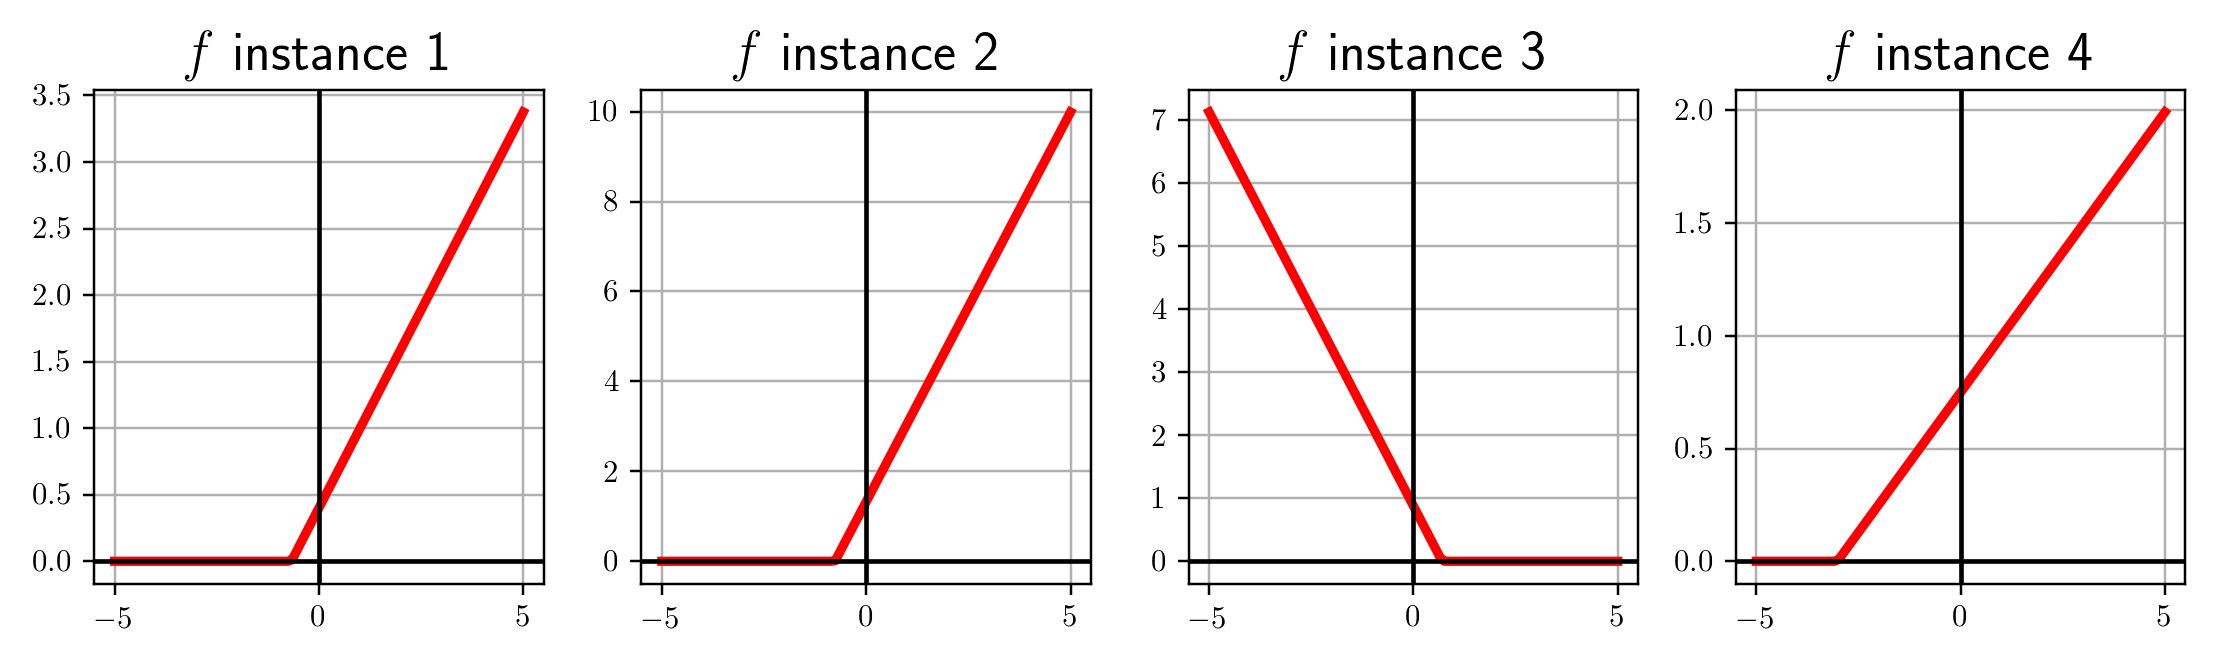

In [104]:
## This code cell will not be shown in the HTML version of this notebook
# build 4 instances of a composition basis: line and tanh
x = np.linspace(-5,5,100)
fig = plt.figure(figsize = (10,3))

for m in range(1,5):
    # make basis element
    w_0 = np.random.randn(1)
    w_1 = np.random.randn(1)
    fm = np.maximum(0,w_0 + w_1*x)
    fm_table = np.stack((x,fm),axis = 1)
    
    # plot the current element
    ax = fig.add_subplot(1,4,m)
    ax.plot(fm_table[:,0],fm_table[:,1],c='r',linewidth = 3)
    ax.set_title('$f$ instance ' + str(m),fontsize = 18)

    # clean up plot
    ax.grid(True, which='both')
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')

plt.show()

To handle higher dimensional input we simply take a linear combination of the input, passing the result through the nonlinear function.  For example, an element $f_j$ for general $N$ dimensional input looks like the following using the relu function

\begin{equation}
f_j\left(\mathbf{x}\right) = \text{max}\left(0,w_{j,0} + w_{j,1}x_1 + \cdots + w_{j,\,N}x_N\right).
\end{equation}

As with the lower dimensional single layer functions, each such function can take on a variety of different shapes based on how we tune its internal parameters.  Below we show $4$ instances of such a function with $N=2$ dimensional input.

<IPython.core.display.Javascript object>


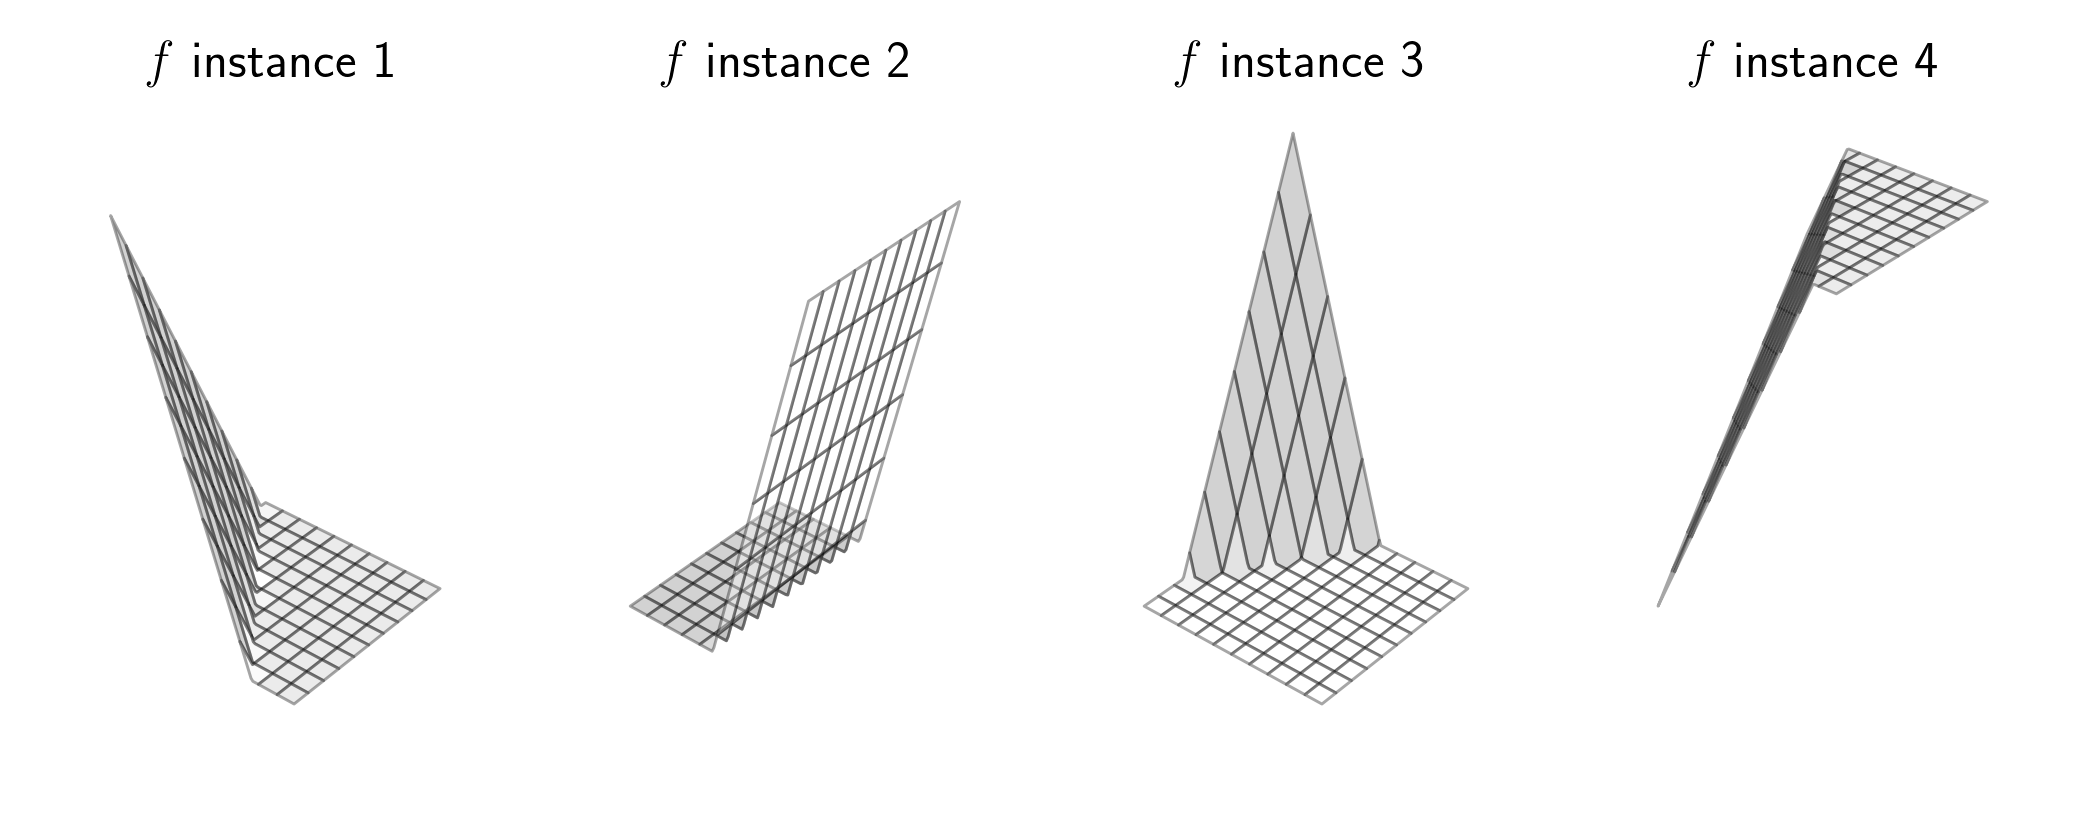

In [47]:
## This code cell will not be shown in the HTML version of this notebook
# generate input values
s = np.linspace(-2,2,100)
x_1,x_2 = np.meshgrid(s,s)
degree_dict = {}

# build 4 polynomial basis elements
fig = plt.figure(num=None, figsize = (10,4), dpi=80, facecolor='w', edgecolor='k')

### plot regression surface ###
p =  [0,1,1,2]
q = [1,2,1,3]
for m in range(4):
    ax1 = plt.subplot(1,4,m+1,projection = '3d')
    ax1.set_axis_off()
    
    # random weights
    w_0 = np.random.randn(1)
    w_1 = np.random.randn(1)
    w_2 = np.random.randn(1)
    w_3 = np.random.randn(1)
    f_m = w_3*np.maximum(0,w_0 + w_1*x_1 + w_2*x_2)

    ax1.plot_surface(x_1,x_2,f_m,alpha = 0.35,color = 'w',zorder = 3,edgecolor = 'k',linewidth=1,cstride = 10, rstride = 10)
    ax1.view_init(20,40) 
    ax1.set_title('$f$ instance ' + str(m+1),fontsize = 18)

fig.subplots_adjust(left=0,right=1,bottom=0,top=1)   # remove whitespace around 3d figure
plt.show()

#### <span style="color:#a50e3e;">Example. </span>  Deeper network example

<IPython.core.display.Javascript object>


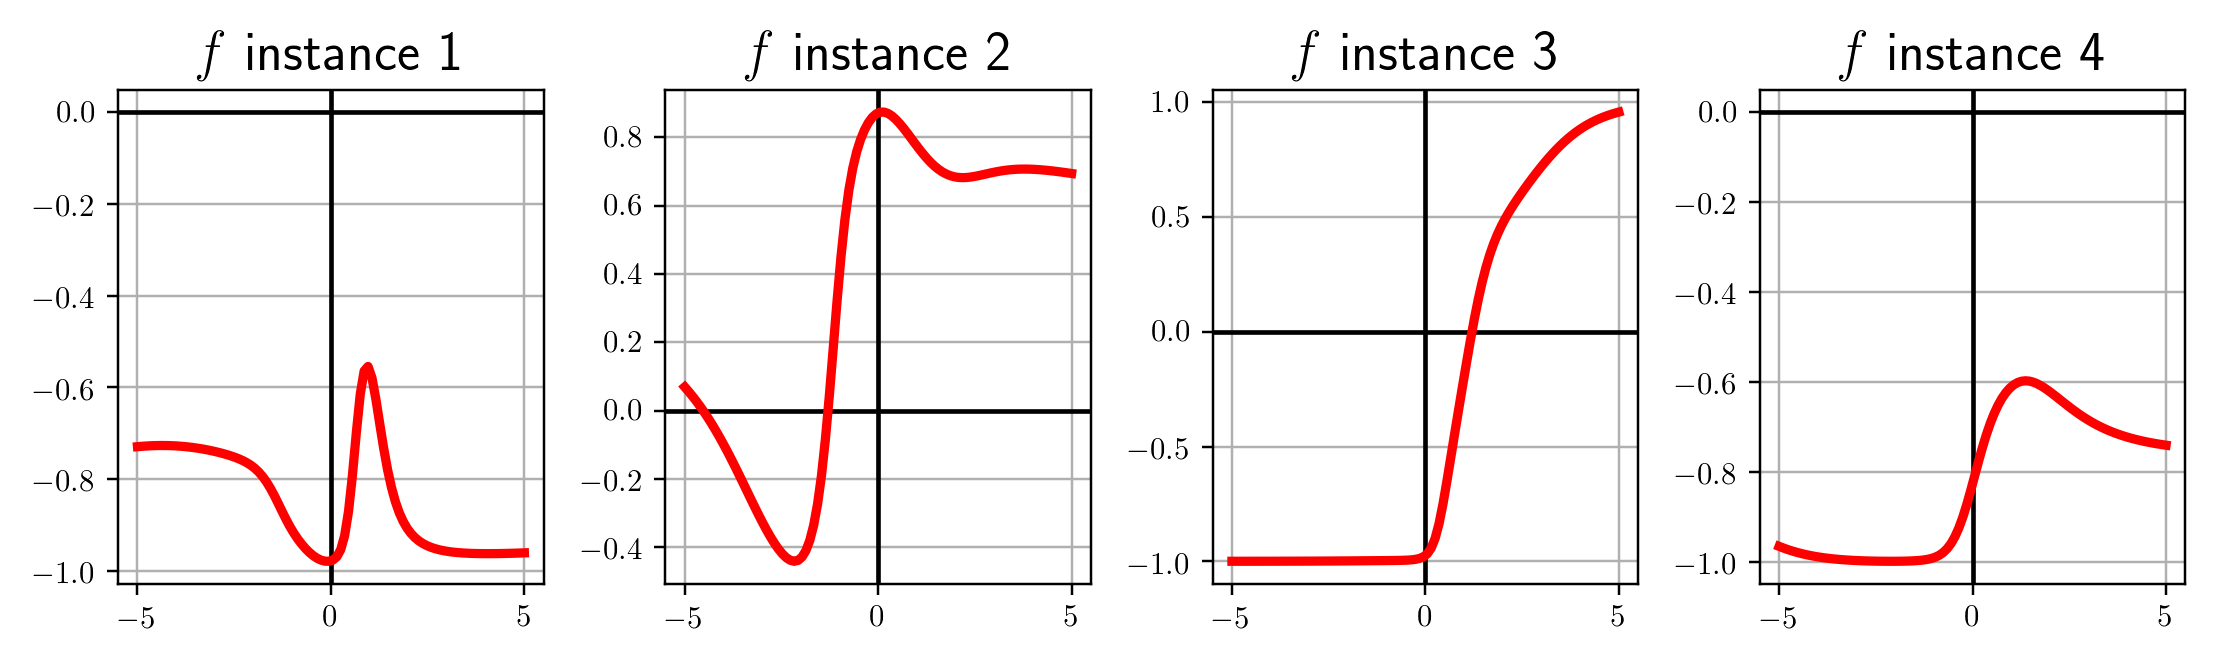

In [129]:
## This code cell will not be shown in the HTML version of this notebook
# build 4 instances of a composition basis: line and tanh and tanh
x = np.linspace(-5,5,100)
fig = plt.figure(figsize = (10,3))

for m in range(1,5):
    # make basis element
    fm = 0
    for j in range(10):
        w_0 = np.random.randn(1)
        w_1 = np.random.randn(1)
        w_3 = np.random.randn(1)
        fm+=w_3*np.tanh(w_0 + w_1*x)
    w_2 = np.random.randn(1)
    w_3 = np.random.randn(1)
    
    fm = np.tanh(w_2 + fm)
    fm_table = np.stack((x,fm),axis = 1)
    
    # plot the current element
    ax = fig.add_subplot(1,4,m)
    ax.plot(fm_table[:,0],fm_table[:,1],c='r',linewidth = 3,zorder = 3)
    ax.set_title('$f$ instance ' + str(m),fontsize = 18)

    # clean up plot
    ax.grid(True, which='both')
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')

plt.show()

#### <span style="color:#a50e3e;">Example. </span>  Deeper trees example

To create a more flexible decision tree basis function we split each level of the stump.  This gives us a *tree* of depth 2 (our first split gave us a stump, another phrase for stump is tree of depth 1).  We can look at this mathematically / figuratively as in the figure below.


<figure>
<p>
  <img src= '../../mlrefined_images/nonlinear_superlearn_images/depth2.png' width="85%" height="65%" alt=""/>
</p>
<figcaption> <strong>Figure 2:</strong> <em> 
An illustration of a depth two tree function from the family of tree-based universal approimators.  Here $V_1$, $V_2$, and $V_3$ are called *split points* and $y_1$ / $y_2$ / $y_3$ / $y_4$ the *levels* of the function.
</em>
</figcaption>
</figure>


This gives a basis element with four (potentially) distinct levels.  Since the location of the splits and the values of the levels can be set in many ways, this gives each element of a tree basis of depth 2 a good deal more flexibility than stumps.  Below we illustrate $4$ instances of a depth $2$ tree.

We describe trees in significantly further detail in Chapter 14.

<IPython.core.display.Javascript object>


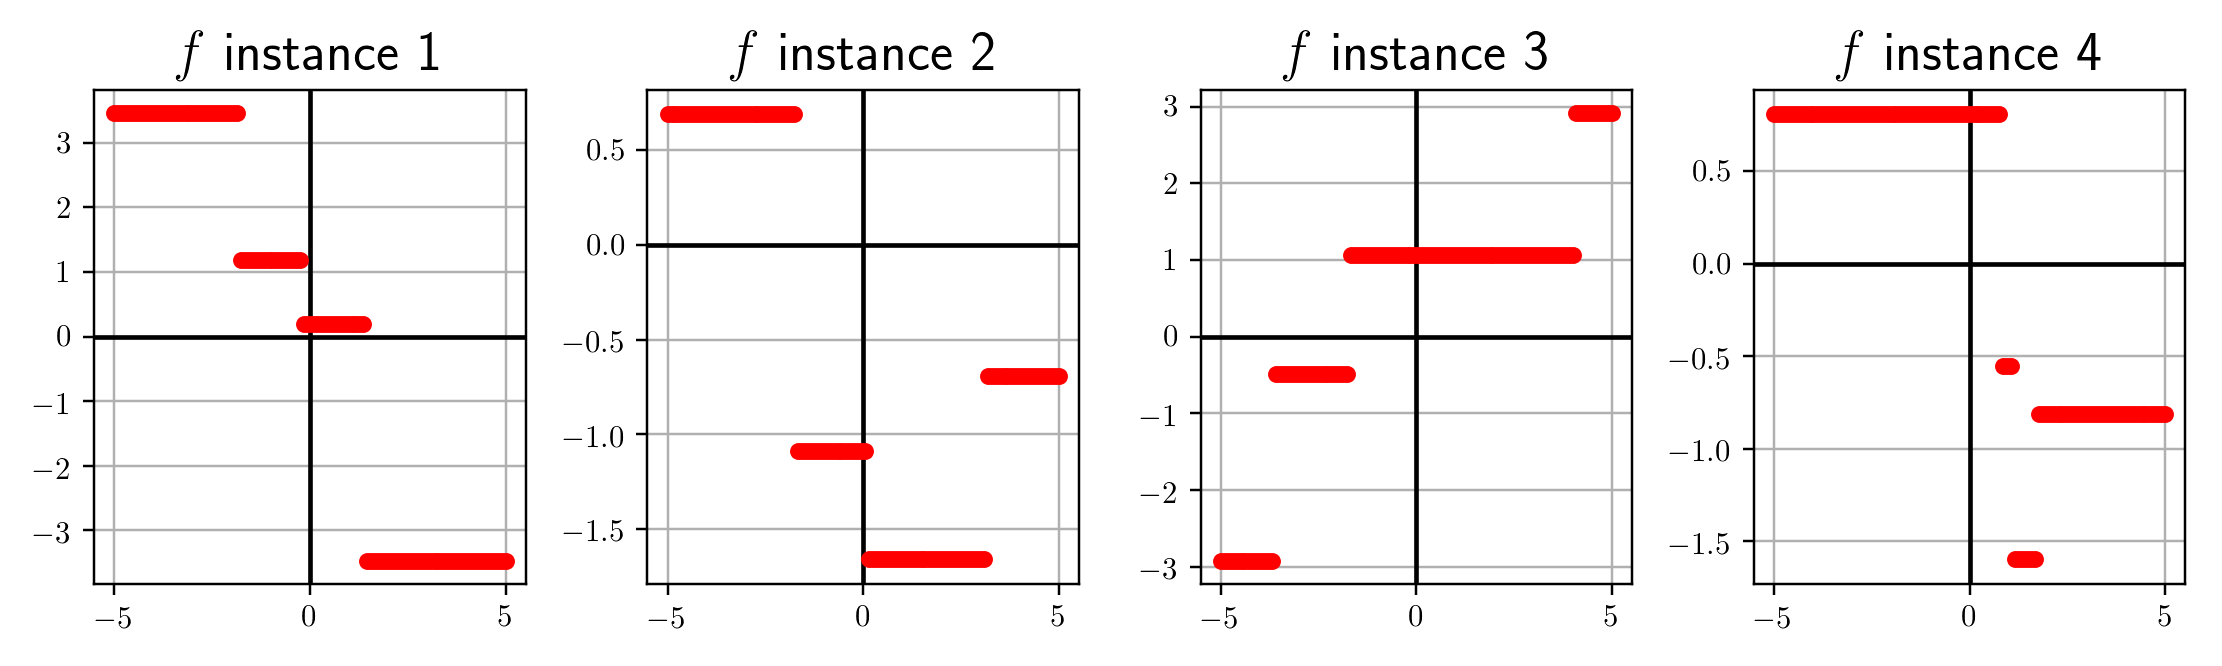

In [54]:
## This code cell will not be shown in the HTML version of this notebook
# build 4 instances of a composition basis: line and tanh
x = np.linspace(-5,5,100)
fig = plt.figure(figsize = (10,3))

for m in range(1,5):
    # make basis element
    w_0 = 0.1*np.random.randn(1)
    w_1 = 0.1*np.random.randn(1)
    w_2 = np.random.randn(1)
    fm = w_2*np.sign(w_0 + w_1*x)
    
    # make basis element
    w_0 = 0.1*np.random.randn(1)
    w_1 = 0.1*np.random.randn(1)
    w_2 = np.random.randn(1)
    gm = w_2*np.sign(w_0 + w_1*x)
    
    # make basis element
    w_0 = 0.1*np.random.randn(1)
    w_1 = 0.1*np.random.randn(1)
    w_2 = np.random.randn(1)
    bm = w_2*np.sign(w_0 + w_1*x)
    fm += gm
    fm += bm
    fm_table = np.stack((x,fm),axis = 1)
    
    # plot the current element
    ax = fig.add_subplot(1,4,m)
    ax.scatter(fm_table[:,0],fm_table[:,1],c='r',s = 20,zorder = 3)
    ax.set_title('$f$ instance ' + str(m),fontsize = 18)

    # clean up plot
    ax.grid(True, which='both')
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')

plt.show()